**Matplotlib** is used for plot, graph, etc.


**Numpy** used for process integer or data.

**PIL** is used to process images.

**Tensorflow** is used for training and learning of deep learning classification model.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Mounting the google Drive






In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Changing directory to MyDrive/ML/Classigication folder

Create required folder called "ML" in google drive and again create sub-folder called Classification inside ML folder




In [ ]:
%cd gdrive/MyDrive/ML/Classification

/content/gdrive/MyDrive/ML/Classification


# Extract data from Data.zip to Data folder

In [ ]:
!unzip Data.zip -d Data/

Archive:  Data.zip
replace Data/ImagesLabelledNegative/10-12-01-19_0.1420909280.01-bot_left.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909280.01-bot_left.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909280.01-bot_right.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909280.01-top_left.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909280.01-top_right.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909285.06-bot_left.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909285.06-bot_right.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909285.06-top_left.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909285.06-top_right.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909290.06-bot_left.png  
  inflating: Data/ImagesLabelledNegative/10-12-01-19_0.1420909290.06-bot_right.png  
  inflating: Data/

# Accessing path of the negative and positive labels

In [ ]:
import pathlib
data_dir = pathlib.Path("Data")
ImagesLabelledNegative = list(data_dir.glob('ImagesLabelledNegative/*'))
print(len(ImagesLabelledNegative))
PIL.Image.open(str(ImagesLabelledNegative[0]))

data_dir = pathlib.Path("Data")
ImagesLabelledPositive = list(data_dir.glob('ImagesLabelledPositive/*'))
print(len(ImagesLabelledPositive))

901
616


# Declaring batch size and image height for further usage.

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

# Intializing data for training purpose.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1517 files belonging to 2 classes.
Using 1214 files for training.


# Initializing data for testing purpose.

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1517 files belonging to 2 classes.
Using 303 files for validation.


# Declaring labels to variables.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['ImagesLabelledNegative', 'ImagesLabelledPositive']


# Displaying some training data to check wheter it is working fine or not.

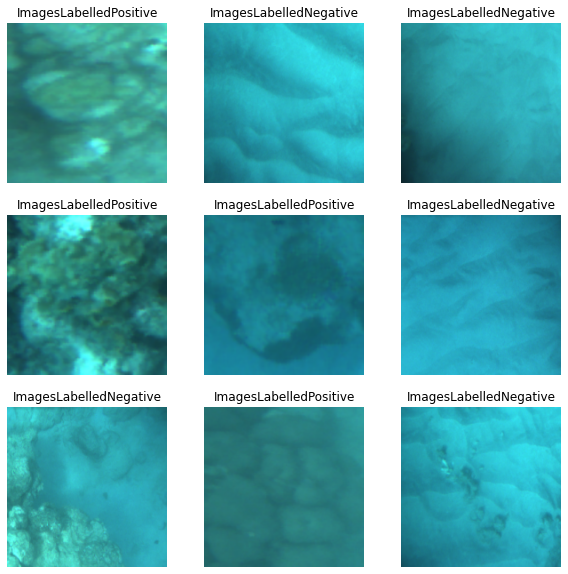

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Checking the shape and size of images and labels.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Autotune is used to shuffle data to a random different batches.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Converting image pixel value from 0 - 255 into 0 - 1.

In [ ]:
normalization_layer = layers.Rescaling(1./255)


# Validating that the values of pixel is converted from 0 - 255 to 0 - 1.  

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.044934653 1.0


# Creating different sequence for the training of the neural network.

It will be used for training as a model.


In [ ]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# It will complie and confirm that model doesn't contain any errors.

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Model summary showcase the details of the created model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# EPOCHS = Epochs is defined as the number of times model will train itself.

model.fit will start the training and store the output into hostory variable.

The higher number of epochs will give the more accuracy and takes more time to train.




In [ ]:
epochs=100
hostory = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/5
38/38 [==============================] - 68s 2s/step - loss: 0.5420 - accuracy: 0.7166 - val_loss: 0.3528 - val_accuracy: 0.8482
Epoch 2/5
38/38 [==============================] - 69s 2s/step - loss: 0.3888 - accuracy: 0.8402 - val_loss: 0.2739 - val_accuracy: 0.8911
Epoch 3/5
38/38 [==============================] - 59s 2s/step - loss: 0.3201 - accuracy: 0.8608 - val_loss: 0.2648 - val_accuracy: 0.9010
Epoch 4/5
38/38 [==============================] - 60s 2s/step - loss: 0.3278 - accuracy: 0.8855 - val_loss: 0.2454 - val_accuracy: 0.9043
Epoch 5/5
38/38 [==============================] - 56s 1s/step - loss: 0.2952 - accuracy: 0.8830 - val_loss: 0.2332 - val_accuracy: 0.8944


# Let's check the accuracy and lose of the training.

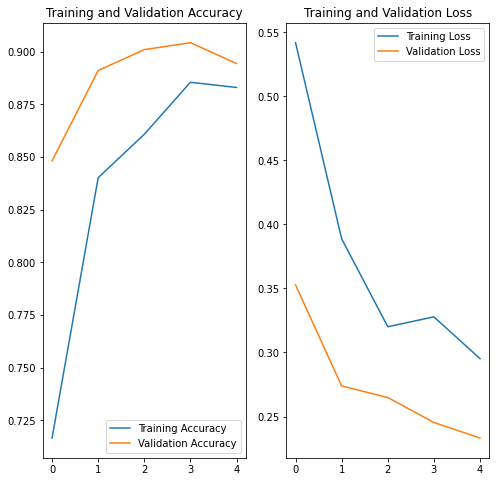

In [ ]:
acc = hostory.history['accuracy']
val_acc = hostory.history['val_accuracy']

loss = hostory.history['loss']
val_loss = hostory.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Assesing a Random image to classify image using above trained model.

In [ ]:
!ls
randomImage = "Data/ImagesLabelledPositive/10-12-01-19_0.1420909310.14-bot_left.png"
print(randomImage)

Data  Data.zip	model1.tflite  model.tflite
Data/ImagesLabelledPositive/10-12-01-19_0.1420909310.14-bot_left.png


# Let's classify the image and print the output.

In [ ]:
img  = tf.keras.utils.load_img(randomImage, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 485ms/step
This image most likely belongs to ImagesLabelledPositive with a 94.20 percent confidence.


# Saving the model for further use by using Tensorflow lite.

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# Loading saved Tensorflow model. 

In [ ]:
TF_MODEL_FILE_PATH = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

# Getting a signature list of the model.

Note down the inputs and outputs for further use.

{'serving_default': {'inputs': ['rescaling_7_input'], 'outputs': ['dense_7']}}


In [ ]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['rescaling_7_input'], 'outputs': ['dense_7']}}

# Let's create a tf classifier.

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

# Let's load and classify a random image and print the output. 

you will find signatures from step 47 i.e. **interpreter.get_signature_list()**
{'serving_default': {'inputs': ['**rescaling_1_input**'], 'outputs': ['**dense_1**']}}


and use it in below one like this 

classify_lite(**rescaling_1_input**=img_array)[**"dense_1"**]



In [ ]:
img  = tf.keras.utils.load_img("Data/ImagesLabelledPositive/10-12-01-19_0.1420909310.14-bot_left.png", target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions_lite = classify_lite(rescaling_7_input=img_array)["dense_7"]
score_lite = tf.nn.softmax(predictions_lite)


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to ImagesLabelledPositive with a 100.00 percent confidence.
